## Making nice graphs

Here I'm going to clean up some of my graphs from progress reports, add titles and axes, and save them for my final presentation. The explanation here is going to be minimal bc this is mostly for me to explore different matplotlib & seaborn stuff.

### Reading in the data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [142]:
sns.set(font_scale=2)

In [2]:
dir = '/users/eva/Documents/Data_Science/Blog-Sentiment-Analysis/'

In [3]:
blogdata = pd.read_csv(dir + 'blog_sentiment_data.csv')

In [12]:
blogdata.head()

,Unnamed: 0,id,gender,age,industry,sign,date,text,sentiment,tokens,polarity_score
0,0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",neutral,"['info', 'found', '100', 'pages', '4', '5', 'm...",0.0000
1,1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,neutral,"['team', 'members', 'drewes', 'van', 'der', 'l...",0.0000
2,2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,negative,"['het', 'kader', 'van', 'kernfusie', 'op', 'aa...",-0.8167
3,3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,neutral,"['testing', 'testing']",0.0000
4,4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,positive,"['thanks', 'yahoo', 'toolbar', 'capture', 'url...",0.8805


### Creating per blogger dataframe

In [4]:
per_blogger = blogdata.drop_duplicates("id")

### Per blogger ages

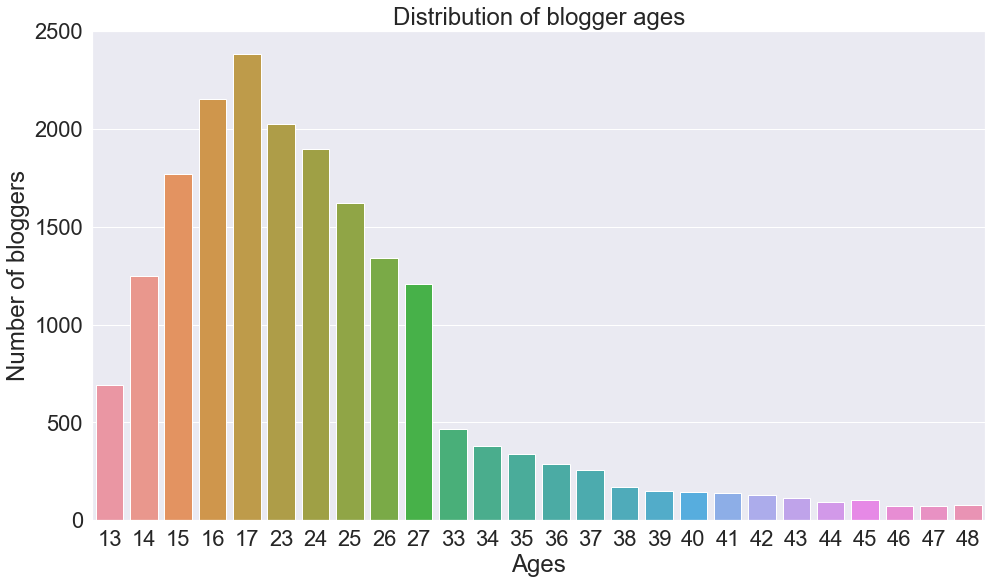

In [143]:
ages = list(set(per_blogger.age))
y = [per_blogger.age[per_blogger.age==x].count() for x in ages]
plt.figure(figsize=(16, 9))
sns.barplot(x=ages, y=y)
plt.ylabel('Number of bloggers')
plt.xlabel('Ages')
plt.title('Distribution of blogger ages')
plt.savefig(dir + '/project_presentation/distribution_of_blogger_ages.png')

### Top 10 industries by blog and blogger

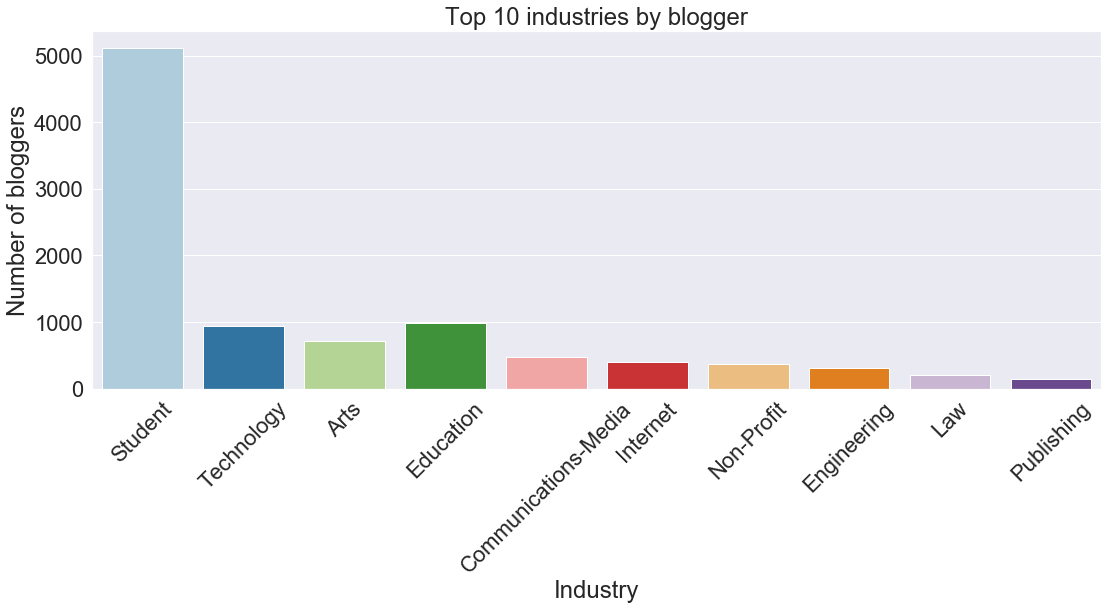

In [155]:
industry = list(top10.index)
y = [per_blogger.industry[per_blogger.industry==x].count() for x in industry]
plt.figure(figsize=(16, 9))
sns.barplot(x=industry, y=y, palette="Paired")
plt.ylabel('Number of bloggers')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.title('Top 10 industries by blogger')
plt.tight_layout()
plt.savefig(dir + '/project_presentation/top_10_industries_blogger.png')

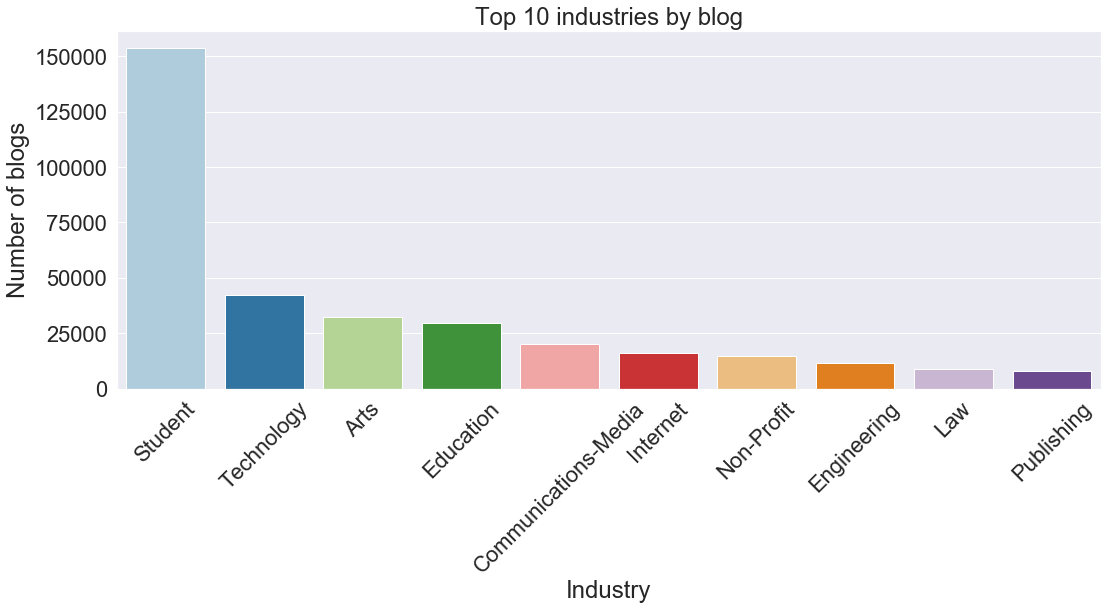

In [156]:
industry = list(top10.index)
y = list(top10)
plt.figure(figsize=(16, 9))
sns.barplot(x=industry, y=y, palette="Paired")
plt.ylabel('Number of blogs')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.title('Top 10 industries by blog')
plt.tight_layout()
plt.savefig(dir + '/project_presentation/top_10_industries_blog.png')

In [141]:
# plt.figure(figsize=(16, 9))
# per_blogger.industry.value_counts().plot(kind="pie")
# plt.legend(loc=5, bbox_to_anchor=(1, 0, 0.5, 1))

### Astrological sign

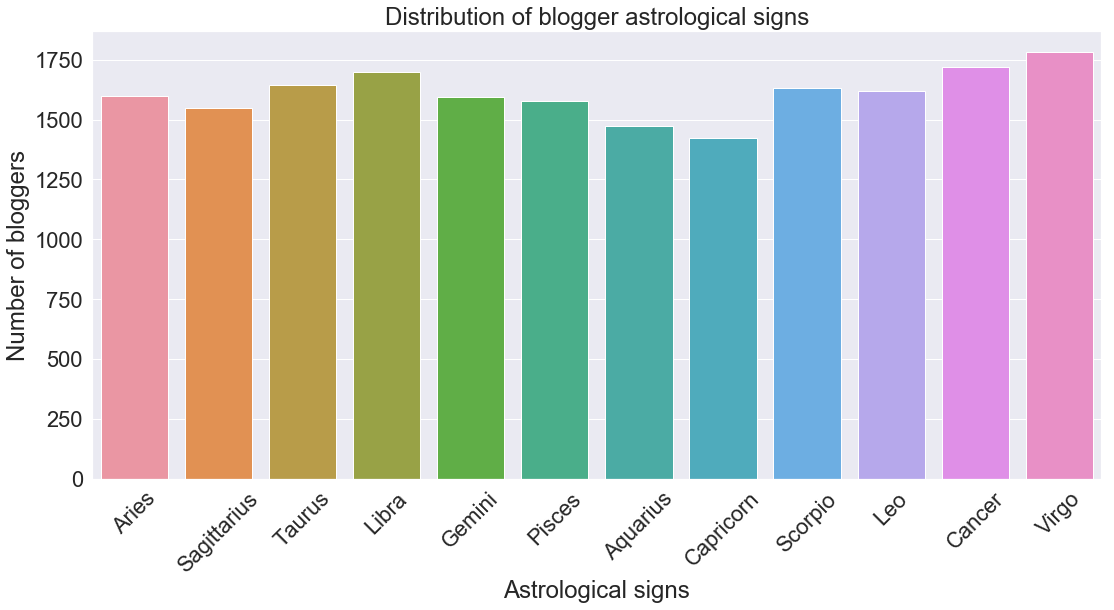

In [161]:
signs = list(set(per_blogger.sign))
y = [per_blogger.sign[per_blogger.sign==x].count() for x in signs]
plt.figure(figsize=(16, 9))
sns.barplot(x=signs, y=y)
plt.ylabel('Number of bloggers')
plt.xlabel('Astrological signs')
plt.title('Distribution of blogger astrological signs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(dir + '/project_presentation/distribution_of_blogger_signs.png')

In [162]:
blogdata.id[:10]

0    2059027
1    2059027
2    2059027
3    2059027
4    3581210
5    3581210
6    3581210
7    3581210
8    3581210
9    3581210
Name: id, dtype: int64

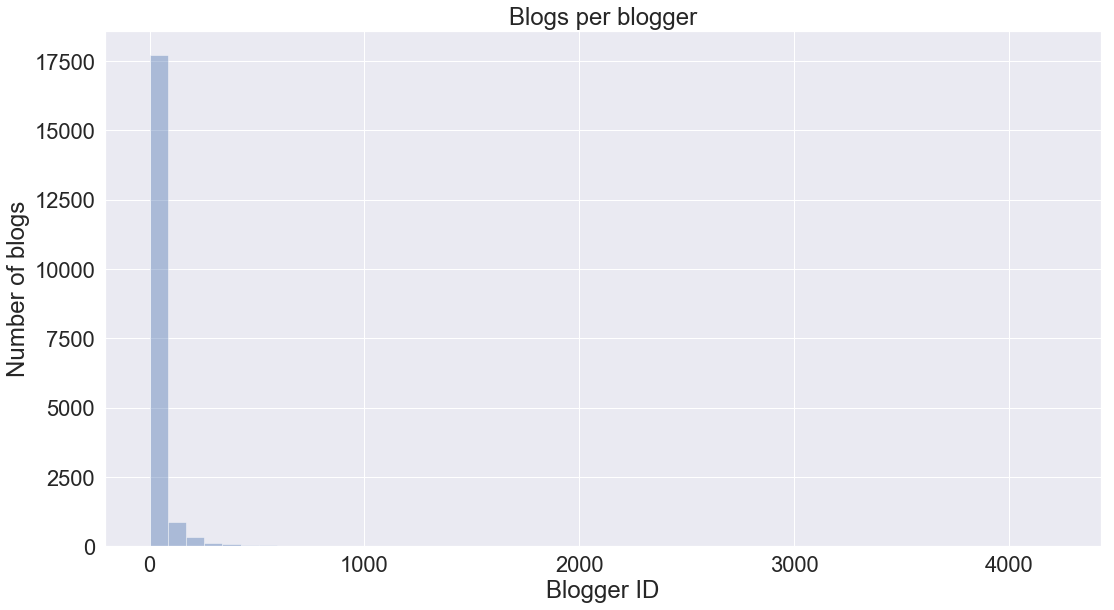

In [173]:
plt.figure(figsize=(16, 9))
sns.distplot(blogdata.id.value_counts(), kde=False)
plt.ylabel('Number of blogs')
plt.xlabel('Blogger ID')
# plt.xticks(rotation=45)
plt.title('Blogs per blogger')
plt.tight_layout()
#plt.savefig(dir + '/project_presentation/blogs_per_blogger.png')

In [178]:
blogdata.id.value_counts().describe()

count    19320.000000
mean        35.263147
std        105.338029
min          1.000000
25%          5.000000
50%         11.000000
75%         27.000000
max       4221.000000
Name: id, dtype: float64

### Word frequencies

In [53]:
from collections import Counter

In [127]:
%pprint

Pretty printing has been turned OFF


In [195]:
x=blogdata[blogdata.index == 0].tokens

In [196]:
q=list(x)

In [197]:
print(q)

["['info', 'found', '100', 'pages', '4', '5', 'mb', 'pdf', 'files', 'wait', 'untill', 'team', 'leader', 'processed', 'learns', 'html']"]


In [198]:
for x in q:
    print(x)

['info', 'found', '100', 'pages', '4', '5', 'mb', 'pdf', 'files', 'wait', 'untill', 'team', 'leader', 'processed', 'learns', 'html']


In [199]:
q = [x for x in q]

In [ ]:
def fix_tokenization(df):
    for list in df.tokens:
        df['tokens'] = print(list)
    

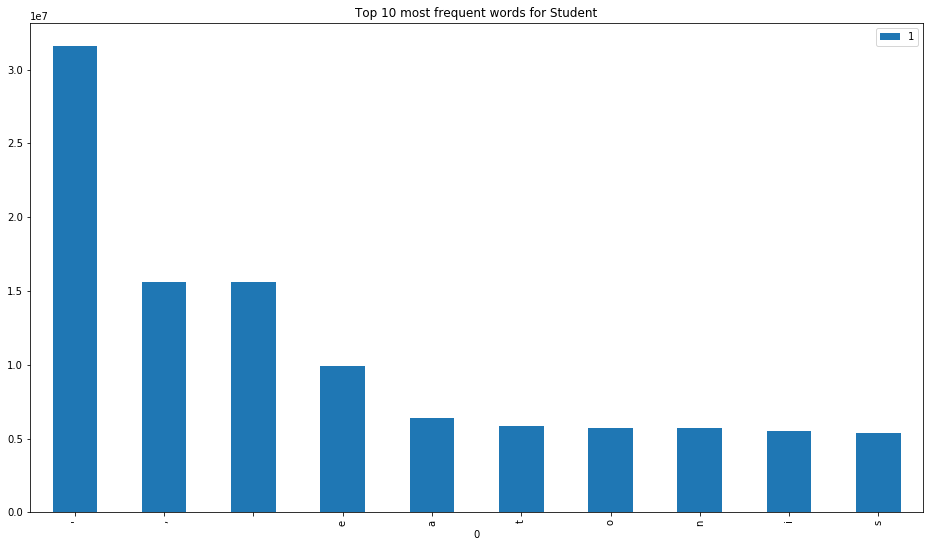

In [122]:
cnt = Counter()
for blog in blogdata[blogdata['industry']=='Student'].tokens:
    cnt.update(blog)
pd.DataFrame(cnt.most_common(10)).set_index(0).plot(kind='bar', 
                                                figsize=(16, 9),
                                                title='Top 10 most frequent words for Student')

In [57]:
def Top10CategoryWords(df, column):
    """
    Find top 10 words for each category in a column and plot.
    """
    ax_count = 0
    fig, axes = plt.subplots(len(set(df[column].values)), 1)
    for category in set(df[column].values):
        cnt = Counter()
        for blog in df[df[column]==category].tokens:
            cnt.update(blog)
        pd.DataFrame(cnt.most_common(10)).set_index(0).plot(kind='bar', 
                                                            figsize=(6,6*len(set(df[column].values))), 
                                                            ax=axes[ax_count], 
                                                            title='Top 10 most frequent words for ' + category)
        ax_count += 1

In [27]:
top10 = blogdata.industry.value_counts()[1:11]

In [102]:
type(top10)

pandas.core.series.Series

In [67]:
print(top10)

Student                 153903
Technology               42055
Arts                     32449
Education                29633
Communications-Media     20140
Internet                 16006
Non-Profit               14700
Engineering              11653
Law                       9040
Publishing                7753
Name: industry, dtype: int64


In [68]:
top10ind = blogdata[blogdata['industry'].isin(top10.index)]

In [69]:
len(top10ind)

337332

In [70]:
top10ind.head()

,Unnamed: 0,id,gender,age,industry,sign,date,text,sentiment,tokens,polarity_score
0,0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",neutral,"['info', 'found', '100', 'pages', '4', '5', 'm...",0.0000
1,1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,neutral,"['team', 'members', 'drewes', 'van', 'der', 'l...",0.0000
2,2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,negative,"['het', 'kader', 'van', 'kernfusie', 'op', 'aa...",-0.8167
3,3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,neutral,"['testing', 'testing']",0.0000
97,97,3668238,female,17,Student,Gemini,"30,June,2004",http://www.uploadimages.net/i...,positive,"['http', 'www', 'uploadimages', 'net', 'images...",0.8328


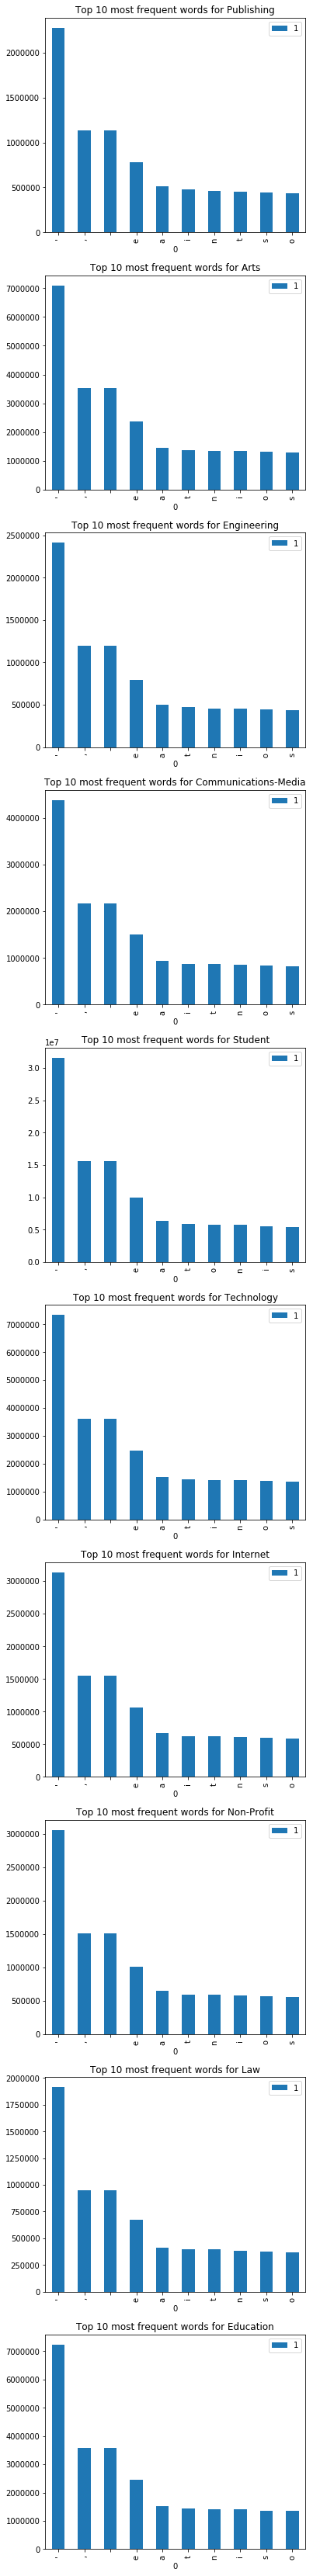

In [71]:
Top10CategoryWords(top10ind, 'industry')

### Sentiment

In [62]:
blogdata.head(1)

,Unnamed: 0,id,gender,age,industry,sign,date,text,sentiment,tokens,polarity_score
0,0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",neutral,"['info', 'found', '100', 'pages', '4', '5', 'm...",0.0


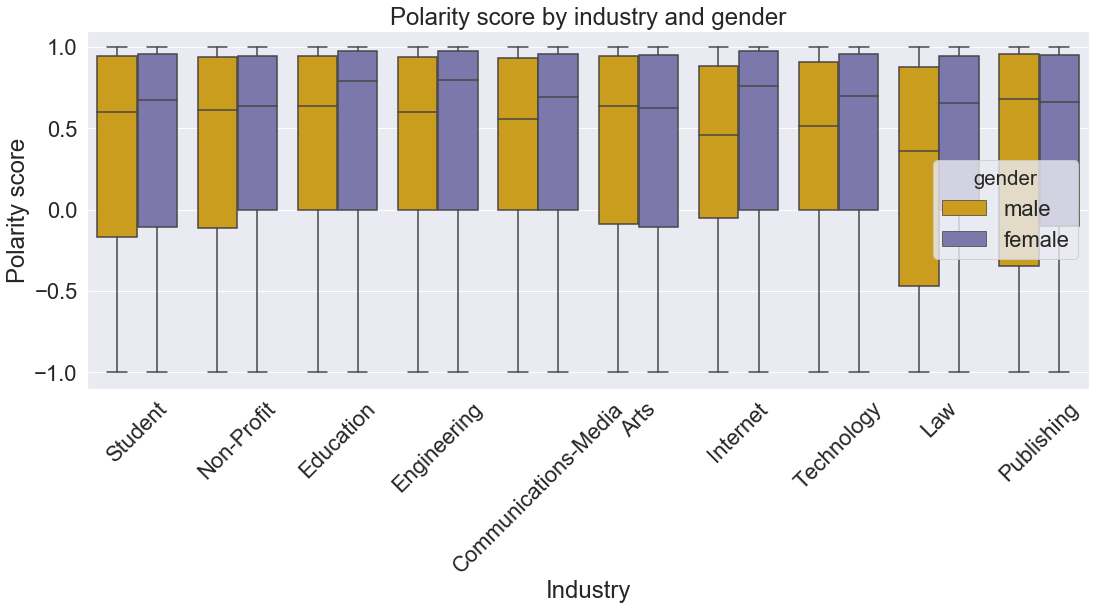

In [158]:
plt.figure(figsize=(16, 9))
sns.boxplot(x="industry", y="polarity_score", palette="Dark2_r",
            hue="gender",
            data=top10ind)
plt.ylabel('Polarity score')
plt.xlabel('Industry')
plt.title('Polarity score by industry and gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(dir + '/project_presentation/polarity_score_industry_gender.png')

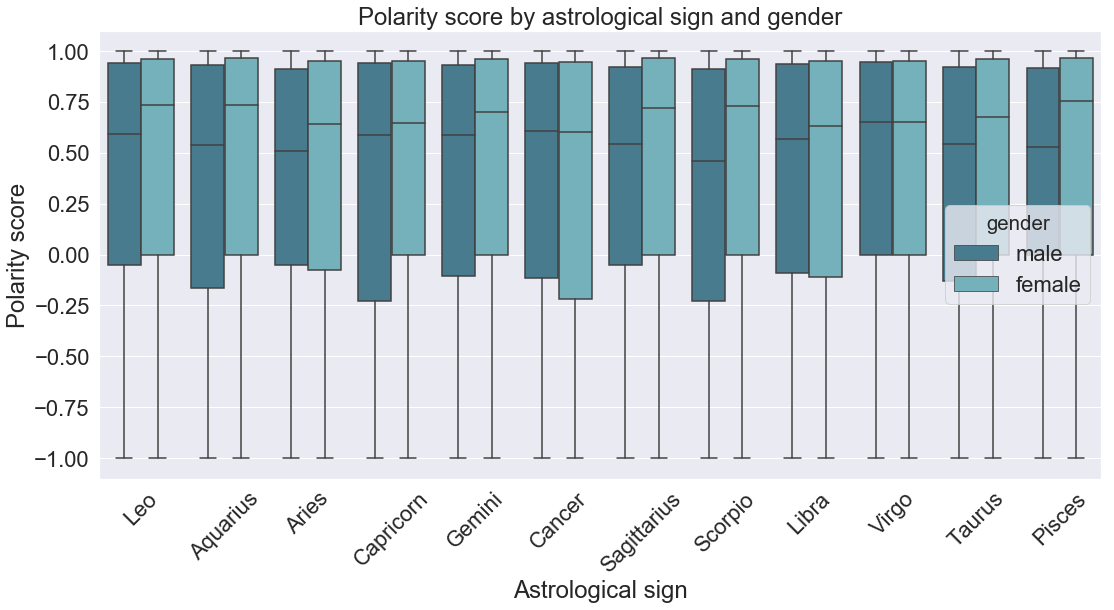

In [210]:
plt.figure(figsize=(16, 9))
sns.boxplot(x="sign", y="polarity_score", palette="GnBu_d",
            hue="gender",
            data=blogdata
plt.ylabel('Polarity score')
plt.xlabel('Astrological sign')
plt.title('Polarity score by astrological sign and gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(dir + '/project_presentation/polarity_score_sign_gender.png')

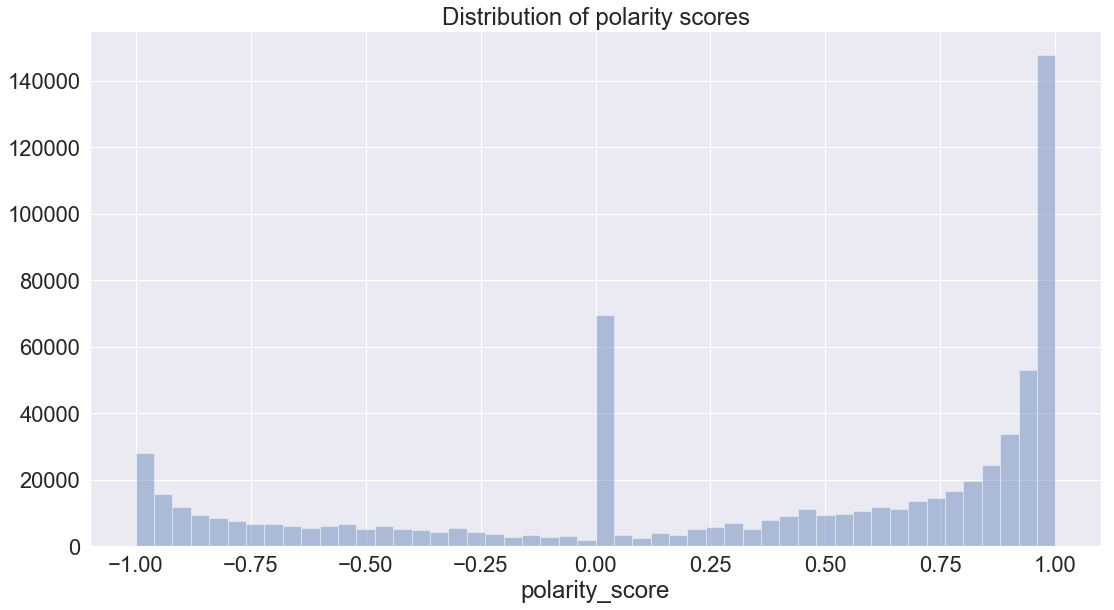

In [212]:
plt.figure(figsize=(16, 9))
sns.distplot(blogdata.polarity_score, kde=False)
plt.title('Distribution of polarity scores')
plt.tight_layout()
plt.savefig(dir + '/project_presentation/polarity_score_distribution.png')

In [243]:
sample = blogdata[blogdata.sentiment == 'neutral'].sample(1).text

In [244]:
for x in sample: print(x)

       Well, I made it through my first Monday. Today was very boring. My four and a half hours moved by pretty slow and being sleepy didn't help it. I sure hope it gets busier then it was today, or I am not going to last very long.  Now I get to wait for Gerry to get home and  go do our taxes. After paying out a couple of years in a  row, this always stressful.           


In [266]:
blogdata[blogdata.polarity_score == 0.00].text.map(len).describe()

count    67535.000000
mean       109.079662
std        190.231915
min          4.000000
25%         49.000000
50%         74.000000
75%        119.000000
max      13914.000000
Name: text, dtype: float64

In [263]:
sample = blogdata[blogdata.polarity_score == 0.00].sample(10).text

In [264]:
for x in sample: print(len(x))

152
22
74
197
67
170
33
67
223
76


In [261]:
for x in sample.map(lambda x: ' '.join(x.split())): print(x + '\n')

Considering how Rai and Mena posts sa groups, that means they could post here but they are not doing so. *Unfair!!!* Kaya nagkaganyan ang blog na ito, eh!!!

urlLink still working on this one, layers make the work much more fun&nbsp; urlLink

..HYEROLLAZ..a.k.a ko0ko0 sistaZ totally rock!!..n i lurve each n evry one of dem 2 pieces!!..heehx..[1]-melissa- [2]-steffi- [3]-juriani- [4]-nabiha- > [5]-sakinah- [6]-nabila- [7]-bridget- [8]-lynette- ...peaceout;)... *muackz*

2004 Reunion urlLink Robert Smith

urlLink

You have to upload the picture to the internet. Use urlLink snooboo.com Files (login at the bottom) to upload your picture, then use this HTML in the blog... &lt;img src=&quot;http://files.snooboo.com/[picture name goes here].jpg&quot; alt=&quot;Picture Name/Description&quot;&gt;

urlLink That famous church.&nbsp; urlLink

urlLink &nbsp; urlLink

one

jennifer reported drum circles, candlelit processions, and an overall sense of community and wonder in the dark canyons of new y

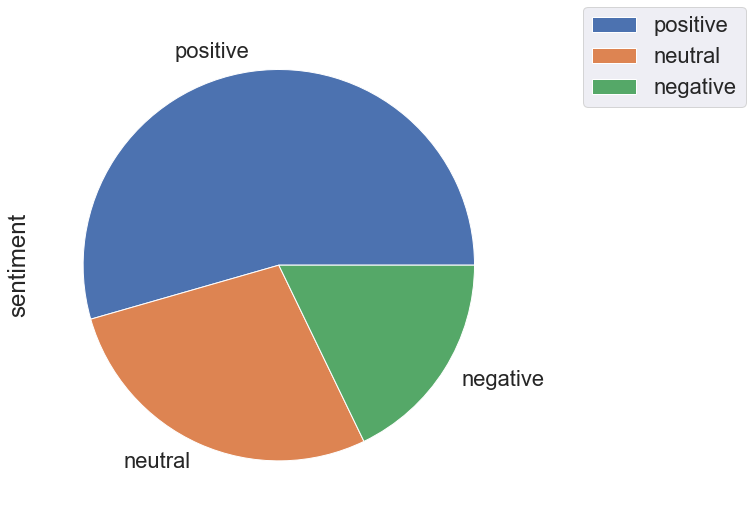

In [221]:
plt.figure(figsize=(16, 9))
blogdata.sentiment.value_counts().plot(kind="pie")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig(dir + '/project_presentation/sentiment_distribution.png')